In [2]:

import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image
from skimage import filters
import scipy.ndimage as ndimage
import random


# Load Images

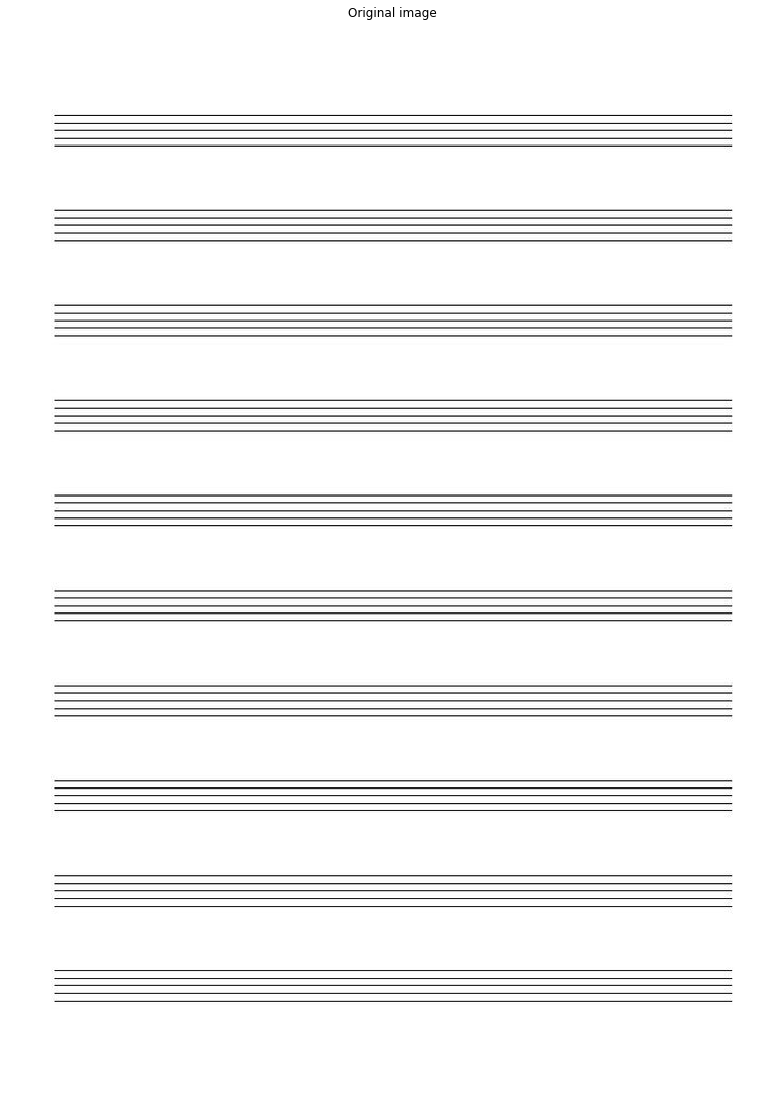

In [3]:
blank_staff = np.asarray(Image.open("blank.jpg"))
red = blank_staff[..., 0]
green = blank_staff[..., 1]
blue = blank_staff[..., 2]

blank_staff = 0.21 * red + 0.72 * green + 0.07 * blue
plt.figure(figsize=(30, 20))
plt.imshow(blank_staff, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')

plt.show()

In [4]:
blank_staff.shape

(995, 705)

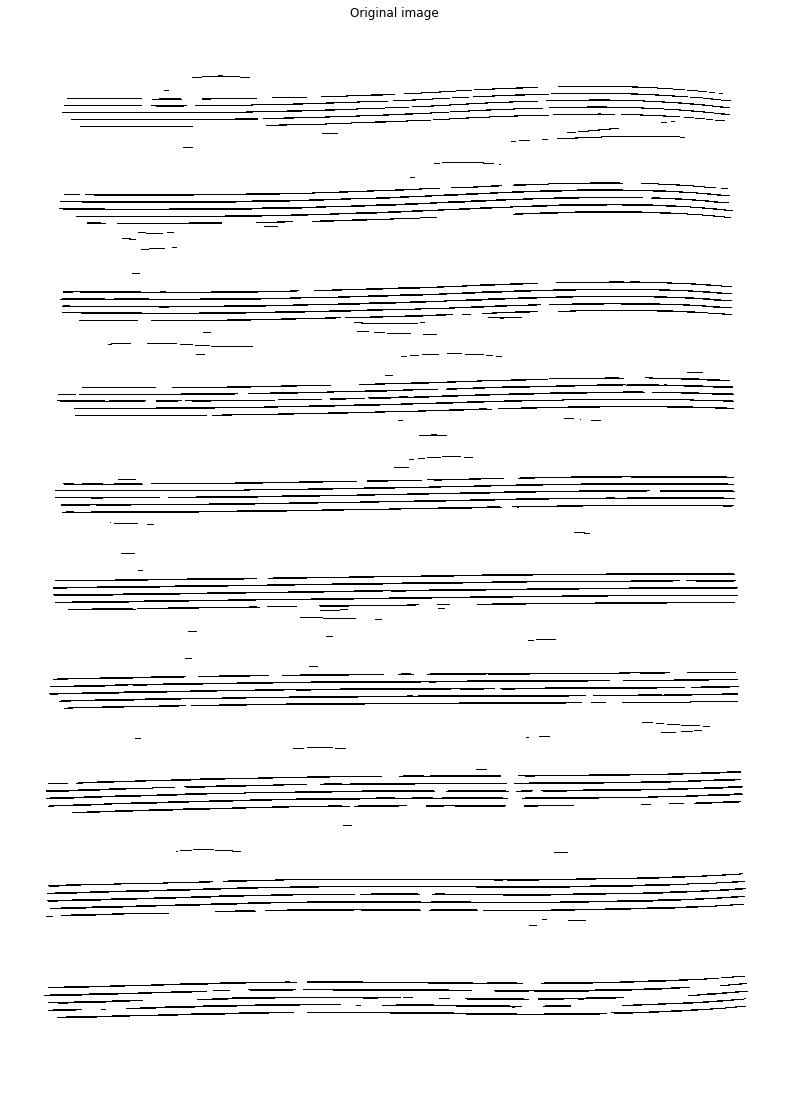

In [5]:

extracted_staff = np.asarray(Image.open("extracted.png"))

plt.figure(figsize=(30, 20))
plt.imshow(extracted_staff, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')

plt.show()

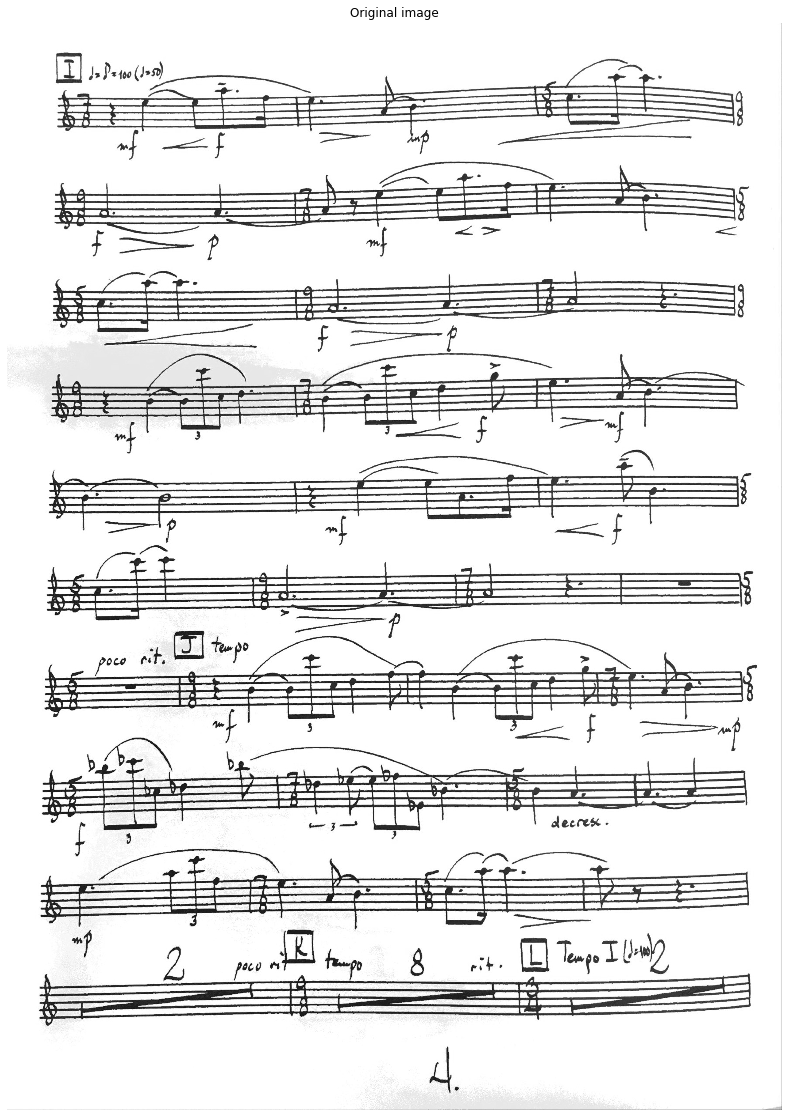

In [12]:
music = np.asarray(Image.open("nc4.jpg"))
red = music[..., 0]
green = music[..., 1]
blue = music[..., 2]

music = 0.21 * red + 0.72 * green + 0.07 * blue

# plot original image
plt.figure(figsize=(30, 20))
plt.imshow(music, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')

plt.show()

## Make Blank Image

In [80]:

difs=[]

def find_runs(arr1):
    arr=arr1.astype(int)
    flat = arr.flatten("F")
    # get 1 at run starts and -1 at run ends
    difs = np.diff(flat)
    run_starts = np.where(difs > 0)[0]
    print(run_starts)
    run_ends = np.where(difs < 0)[0]
    print(run_ends[len(run_ends)-1])
    runlengths =  run_ends - run_starts
    return scipy.stats.mode(runlengths)[0][0]

In [81]:
arr = np.array([[0,0,0],
                [255,255,255],
                [0,255,0],
                [0,0,0]])

In [83]:
music[0][0]

0

In [85]:
music[music.shape[0]-1][music.shape[1]-1]

255

In [51]:
scipy.stats.mode(np.diff(flat))[0][0]

0.0

In [ ]:
def make_blank_img(music):
    blank_img = np.zeros(music.shape)
    staff_num = 10 # will be caluclated from ccs
    vert_run = 


# Point-Based Deformation

## Convert Blank image to points

In [6]:
val = filters.threshold_otsu(blank_staff)
blank_points = blank_staff > val

In [7]:
blank_points_tuple = np.where( blank_points == False)

In [8]:
blank_points_tuple

(array([ 85,  85,  85, ..., 895, 895, 895]),
 array([ 43,  44,  45, ..., 660, 661, 662]))

In [9]:
#Sample 100


In [10]:
bps =np.zeros((2, len(blank_points_tuple[0])))
bps[0]=blank_points_tuple[0]
bps[1]=blank_points_tuple[1]

In [11]:
blank_points=bps.T

In [12]:
blank_points

array([[ 85.,  43.],
       [ 85.,  44.],
       [ 85.,  45.],
       ...,
       [895., 660.],
       [895., 661.],
       [895., 662.]])

In [38]:
len(blank_points)

46475

In [42]:
blank_points_sample = random.sample(list(blank_points), 5000)

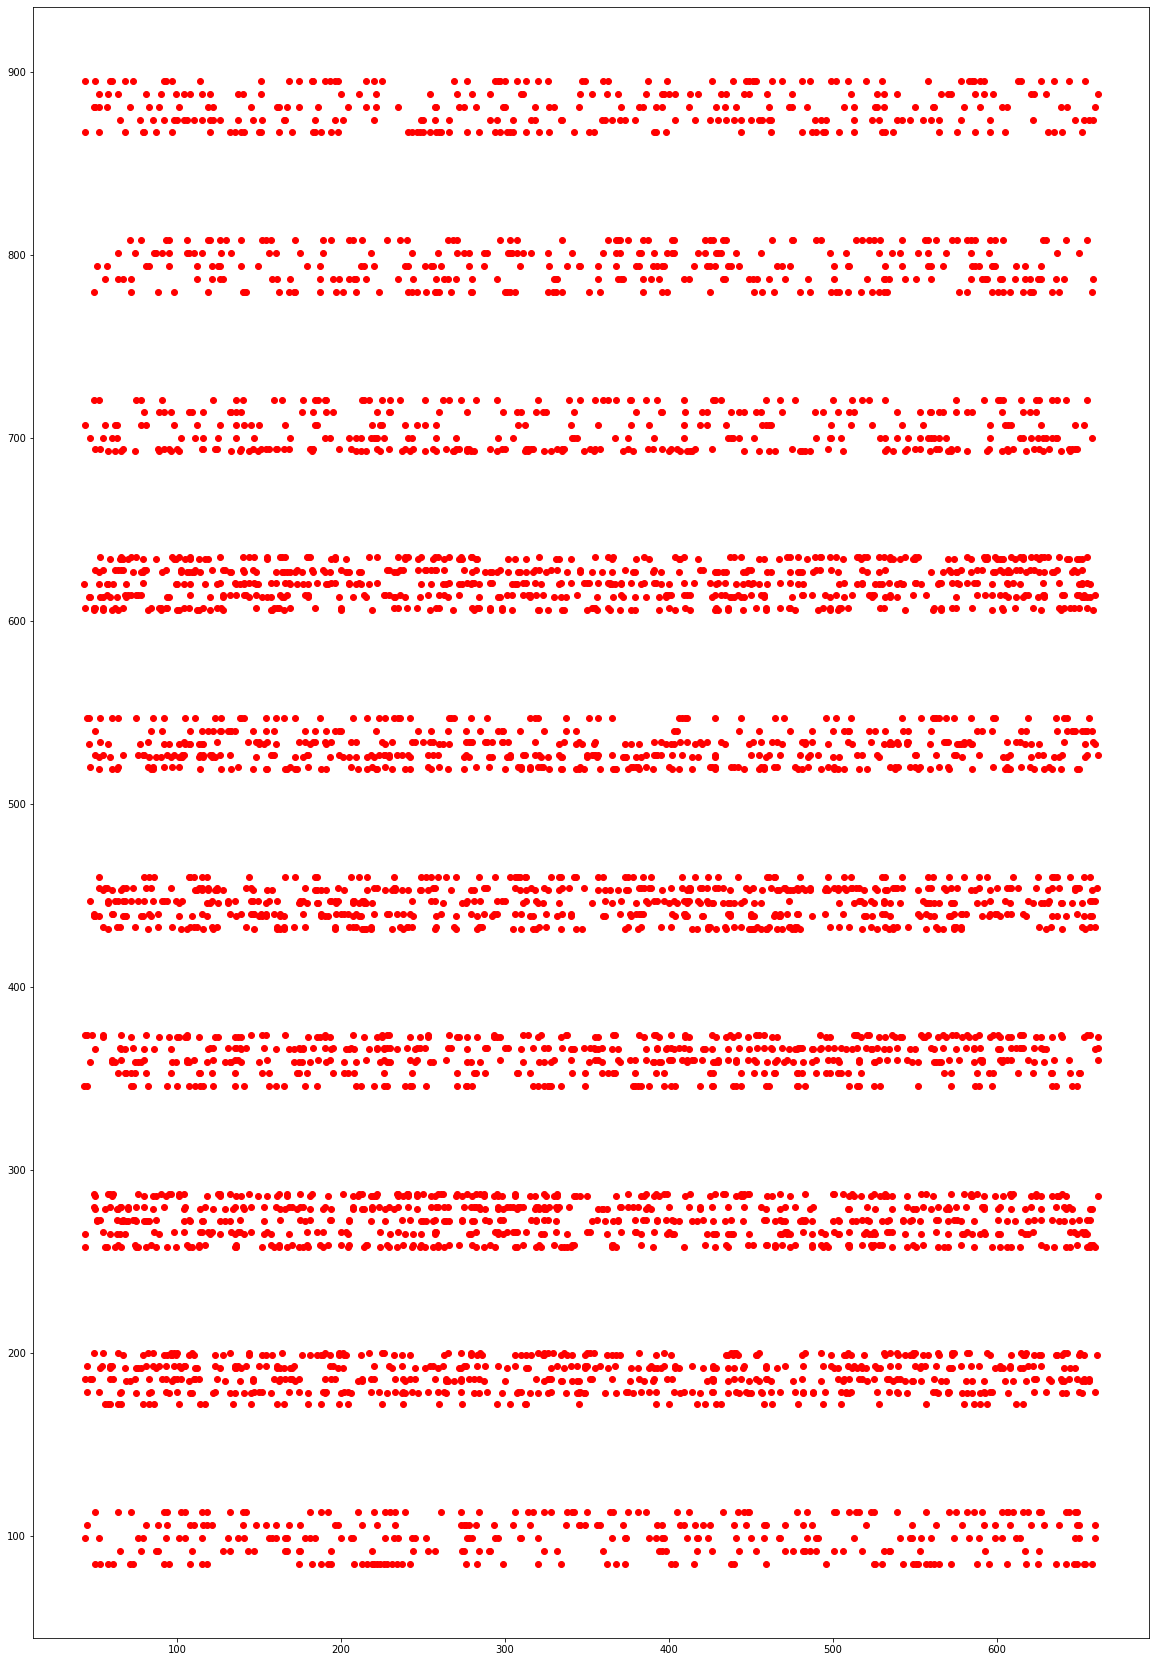

In [44]:
getx = lambda x: x[0]
gety = lambda x: x[1]
plt.figure(figsize=(20,30))
x=list(map(getx, blank_points_sample))
y=list(map(gety, blank_points_sample))
plt.plot(y,x, 'ro')
plt.show()

In [71]:
blank_points_sample_arr=np.stack(blank_points_sample, axis=0)

In [72]:
blank_points_sample_arr

array([[881., 167.],
       [881., 145.],
       [628., 607.],
       ...,
       [533., 483.],
       [527., 259.],
       [801., 430.]])

Normalize to size of extracted staff

In [26]:
xfactor = extracted_staff.shape[0]/blank_staff.shape[0]
yfactor = extracted_staff.shape[1]/blank_staff.shape[1]

blank_points_sample_arr[0: len(blank_points_sample_arr), 0]= \
    blank_points_sample_arr[0: len(blank_points_sample_arr), 0]*xfactor

blank_points_sample_arr[0: len(blank_points_sample_arr), 1]= \
    blank_points_sample_arr[0: len(blank_points_sample_arr), 1]*yfactor

blank_points_sample_arr =blank_points_sample_arr.astype(int)

NameError: name 'blank_points_sample_arr' is not defined

In [74]:
blank_points_sample_arr

array([[2921,  556],
       [2921,  483],
       [2082, 2023],
       ...,
       [1767, 1610],
       [1747,  863],
       [2656, 1433]])

## Convert extracted staff image to points

In [18]:
extracted_points_tuple = np.where(extracted_staff < 100)

In [19]:
extracted_points_tuple

(array([ 114,  114,  114, ..., 3299, 3299, 3299]),
 array([1828, 1829, 1830, ..., 2347, 2348, 2349]))

In [20]:
eps =np.zeros((2, len(extracted_points_tuple[0])))
eps[0]=extracted_points_tuple[0]
eps[1]=extracted_points_tuple[1]

In [21]:
extracted_points=eps.T

In [45]:
extracted_points_sample = np.asarray(random.sample(list(extracted_points), 5000))

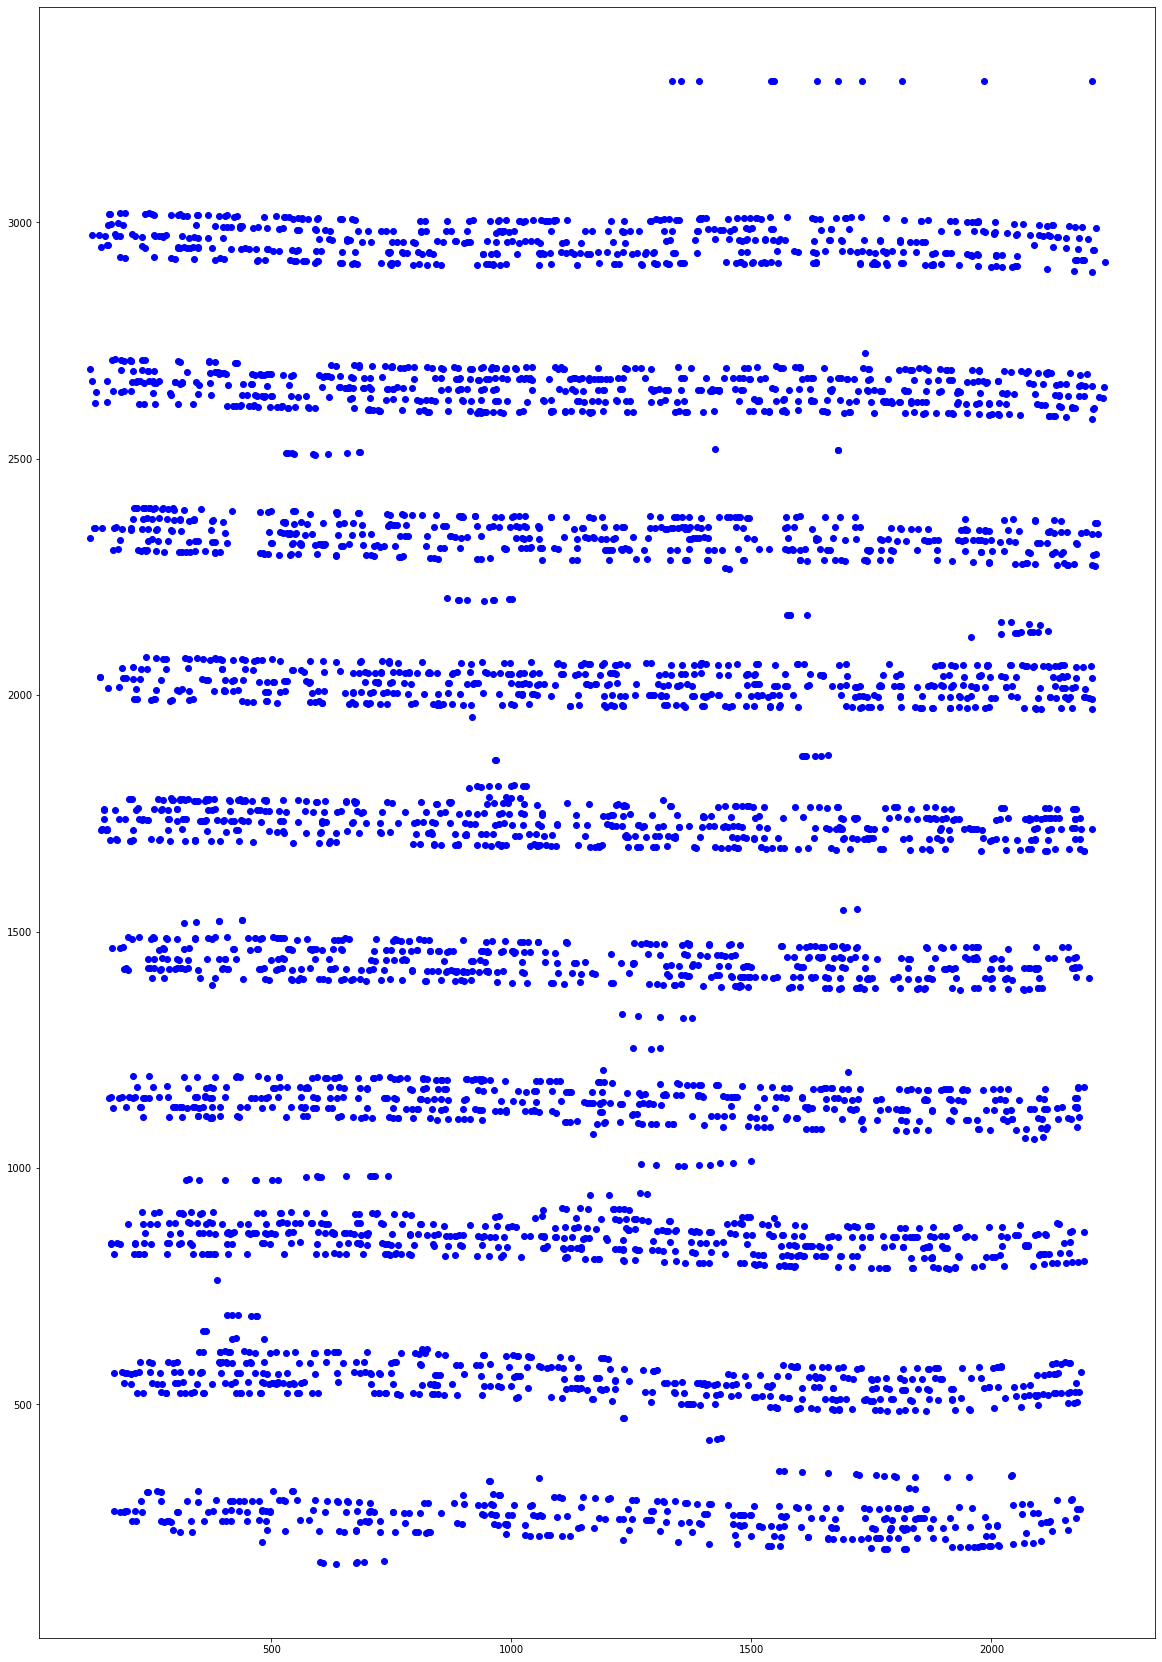

In [46]:
getx = lambda x: x[0]
gety = lambda x: x[1]
plt.figure(figsize=(20,30))
x=list(map(getx, extracted_points_sample))
y=list(map(gety, extracted_points_sample))
plt.plot(y,x, 'bo')
plt.show()

In [52]:
extracted_points_sample_arr=np.stack(extracted_points_sample, axis=0).astype(int)

In [53]:
extracted_points_sample_arr

array([[ 817,  284],
       [2508,  592],
       [1163,  942],
       ...,
       [1699, 1506],
       [ 830, 1066],
       [1087, 2178]])

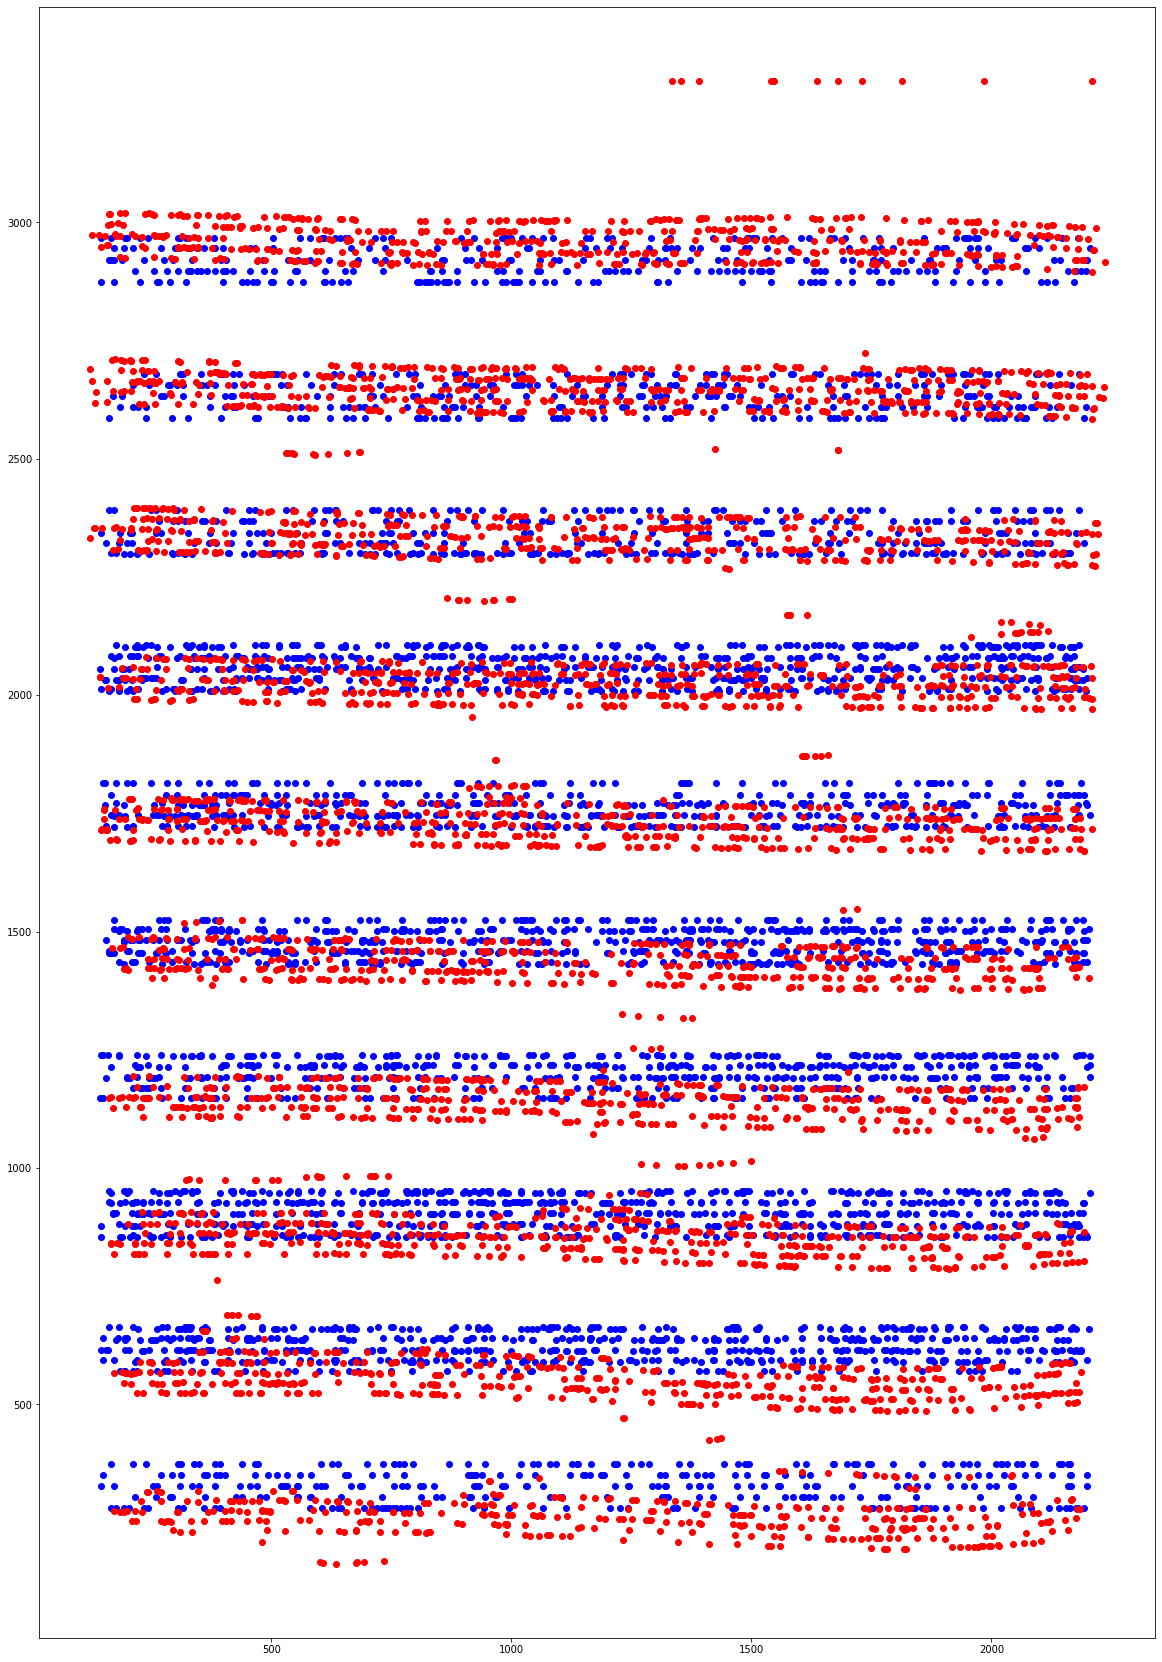

In [85]:
getx = lambda x: x[0]
gety = lambda x: x[1]
plt.figure(figsize=(20,30))
b_x=list(map(getx, blank_points_sample_arr))
b_y=list(map(gety, blank_points_sample_arr))
plt.plot(b_y,b_x, 'bo')
t_x=list(map(getx, extracted_points_sample_arr))
t_y=list(map(gety, extracted_points_sample_arr))
plt.plot(t_y, t_x, 'ro')

plt.show()

## Test deformable point based registration

Code adapted from https://github.com/siavashk/pycpd/tree/master/examples
Not sure if they need 1 to 1 correspondence

In [76]:
xlist=[]
ylist=[]

[[2921  556]
 [2921  483]
 [2082 2023]
 ...
 [1767 1610]
 [1747  863]
 [2656 1433]]


KeyboardInterrupt: 

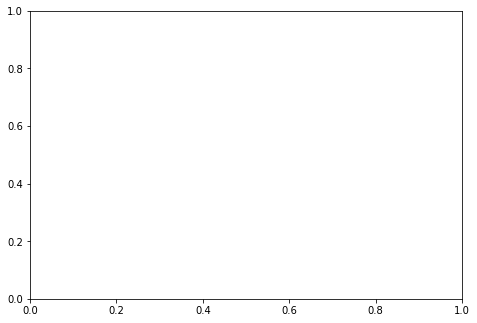

In [86]:

from functools import partial
import matplotlib.pyplot as plt
from pycpd import deformable_registration
import numpy as np
import time

def visualize(iteration, error, X, Y):
    #plt.cla()
    if error < 5:
        xlist.append(X)
        ylist.append(Y)
    fig, ax = plt.subplots()
    ax.scatter(X[:,0] ,  X[:,1], color='red', label='Target')
    ax.scatter(Y[:,0] ,  Y[:,1], color='blue', label='Source')
    plt.text(0.87, 0.92, 'Iteration: {:d}\nError: {:06.4f}'.format(iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.1)
    

def pb_register():
    X = blank_points_sample_arr
    print(X)
    Y = extracted_points_sample_arr

    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize)

    reg = deformable_registration(**{ 'X': X, 'Y': Y })
    reg.register(callback)
    plt.show()


if __name__ == '__main__':
    main()

In [81]:
blank_registered = xlist[len(xlist)-1]

In [82]:
target_registered = ylist[len(ylist)-1]

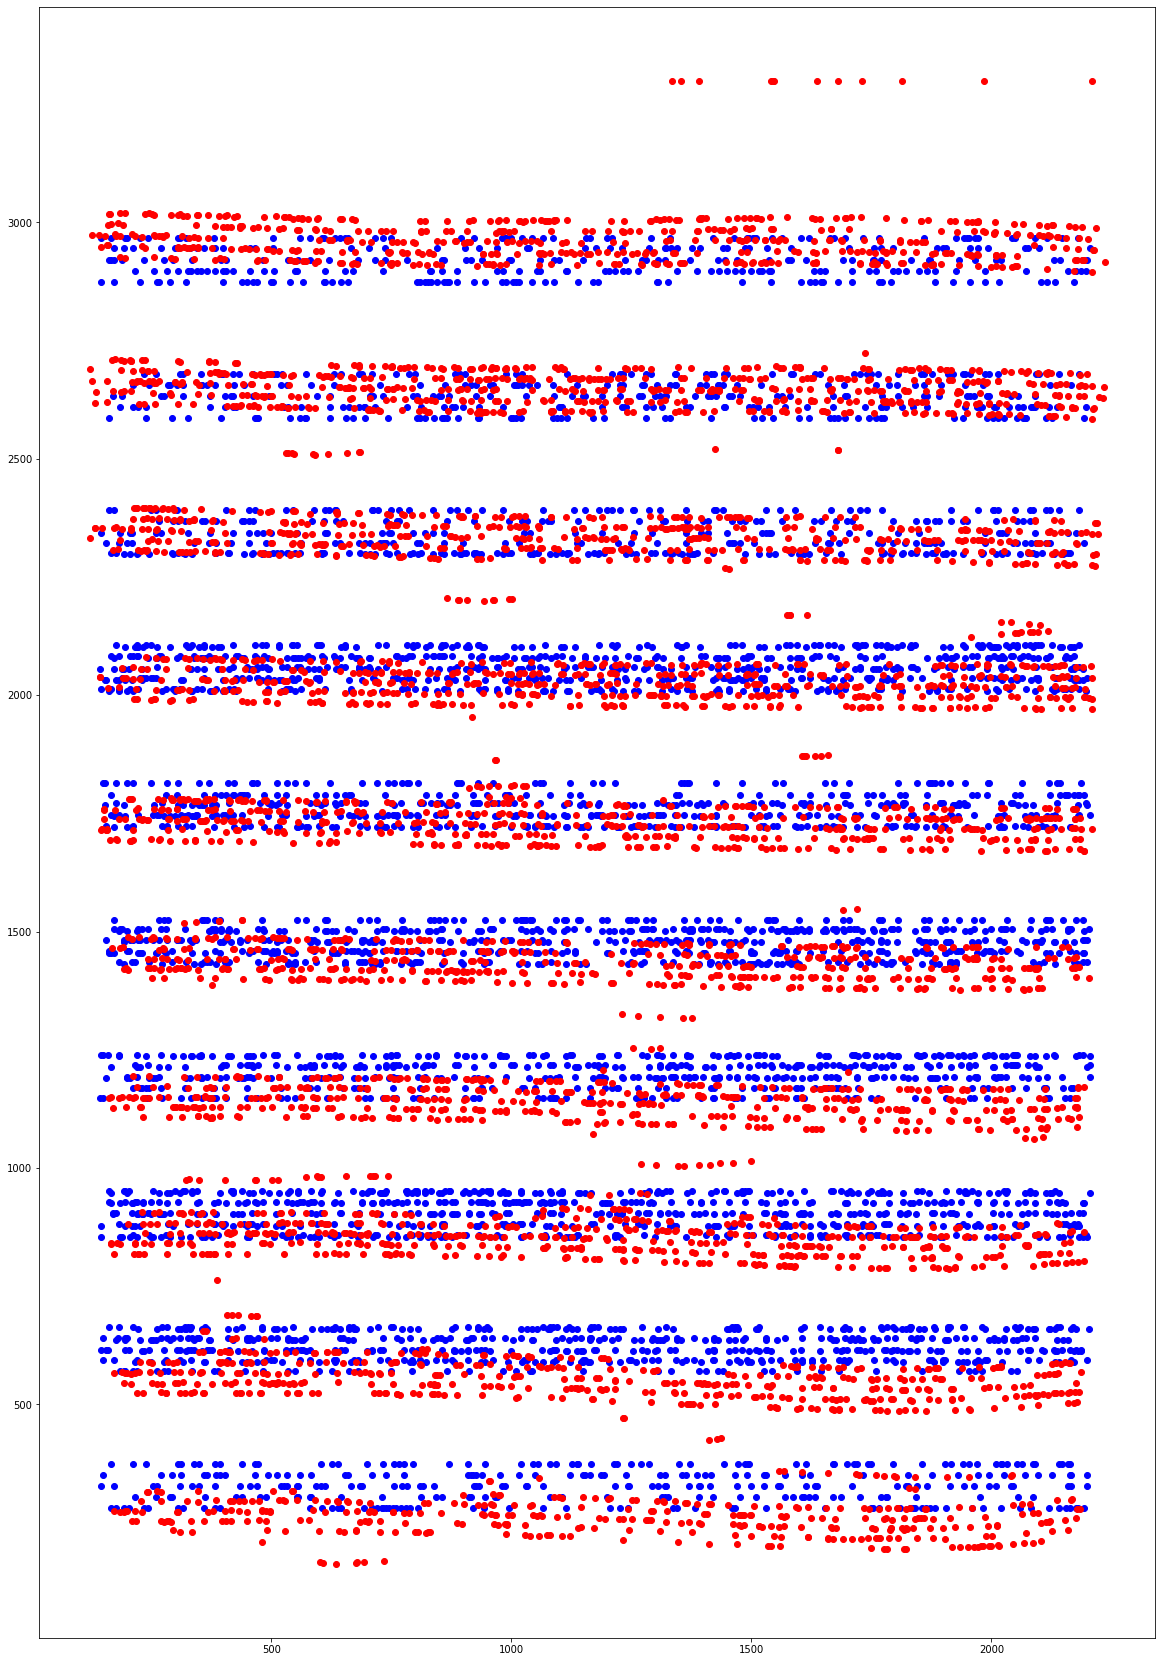

In [83]:
getx = lambda x: x[0]
gety = lambda x: x[1]
plt.figure(figsize=(20,30))
b_x=list(map(getx, blank_registered))
b_y=list(map(gety, blank_registered))
plt.plot(b_y,b_x, 'bo')
t_x=list(map(getx, target_registered))
t_y=list(map(gety, target_registered))
plt.plot(t_y, t_x, 'ro')

plt.show()

In [ ]:
from functools import partial
import matplotlib.pyplot as plt
from pycpd import deformable_registration
import numpy as np
import time

def visualize(iteration, error, X, Y):
    #plt.cla()
    if error < 5:
        xlist.append(X)
        ylist.append(Y)
    fig, ax = plt.subplots()
    ax.scatter(X[:,0] ,  X[:,1], color='red', label='Target')
    ax.scatter(Y[:,0] ,  Y[:,1], color='blue', label='Source')
    plt.text(0.87, 0.92, 'Iteration: {:d}\nError: {:06.4f}'.format(iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.1)
    

def pb_register():
    X = blank_points_sample_arr
    print(X)
    Y = extracted_points_sample_arr

    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize)

    reg = deformable_registration(**{ 'X': X, 'Y': Y })
    reg.register(callback)
    plt.show()


if __name__ == '__main__':
    main()

# Test DIPY elastic deformation

## Converting Data

In [7]:
music

array([[255., 255., 255., ..., 253., 213.,  90.],
       [255., 255., 255., ..., 255., 215.,  93.],
       [255., 255., 255., ..., 255., 215.,  92.],
       ...,
       [255., 255., 255., ..., 191., 153.,  56.],
       [236., 236., 236., ..., 169., 139.,  53.],
       [184., 184., 184., ...,  53.,  48.,  29.]])

In [13]:
val1 = filters.threshold_otsu(music)
music[music > val1]= 255
music[music <= val1]=0

music = ~(music.astype(np.uint8))

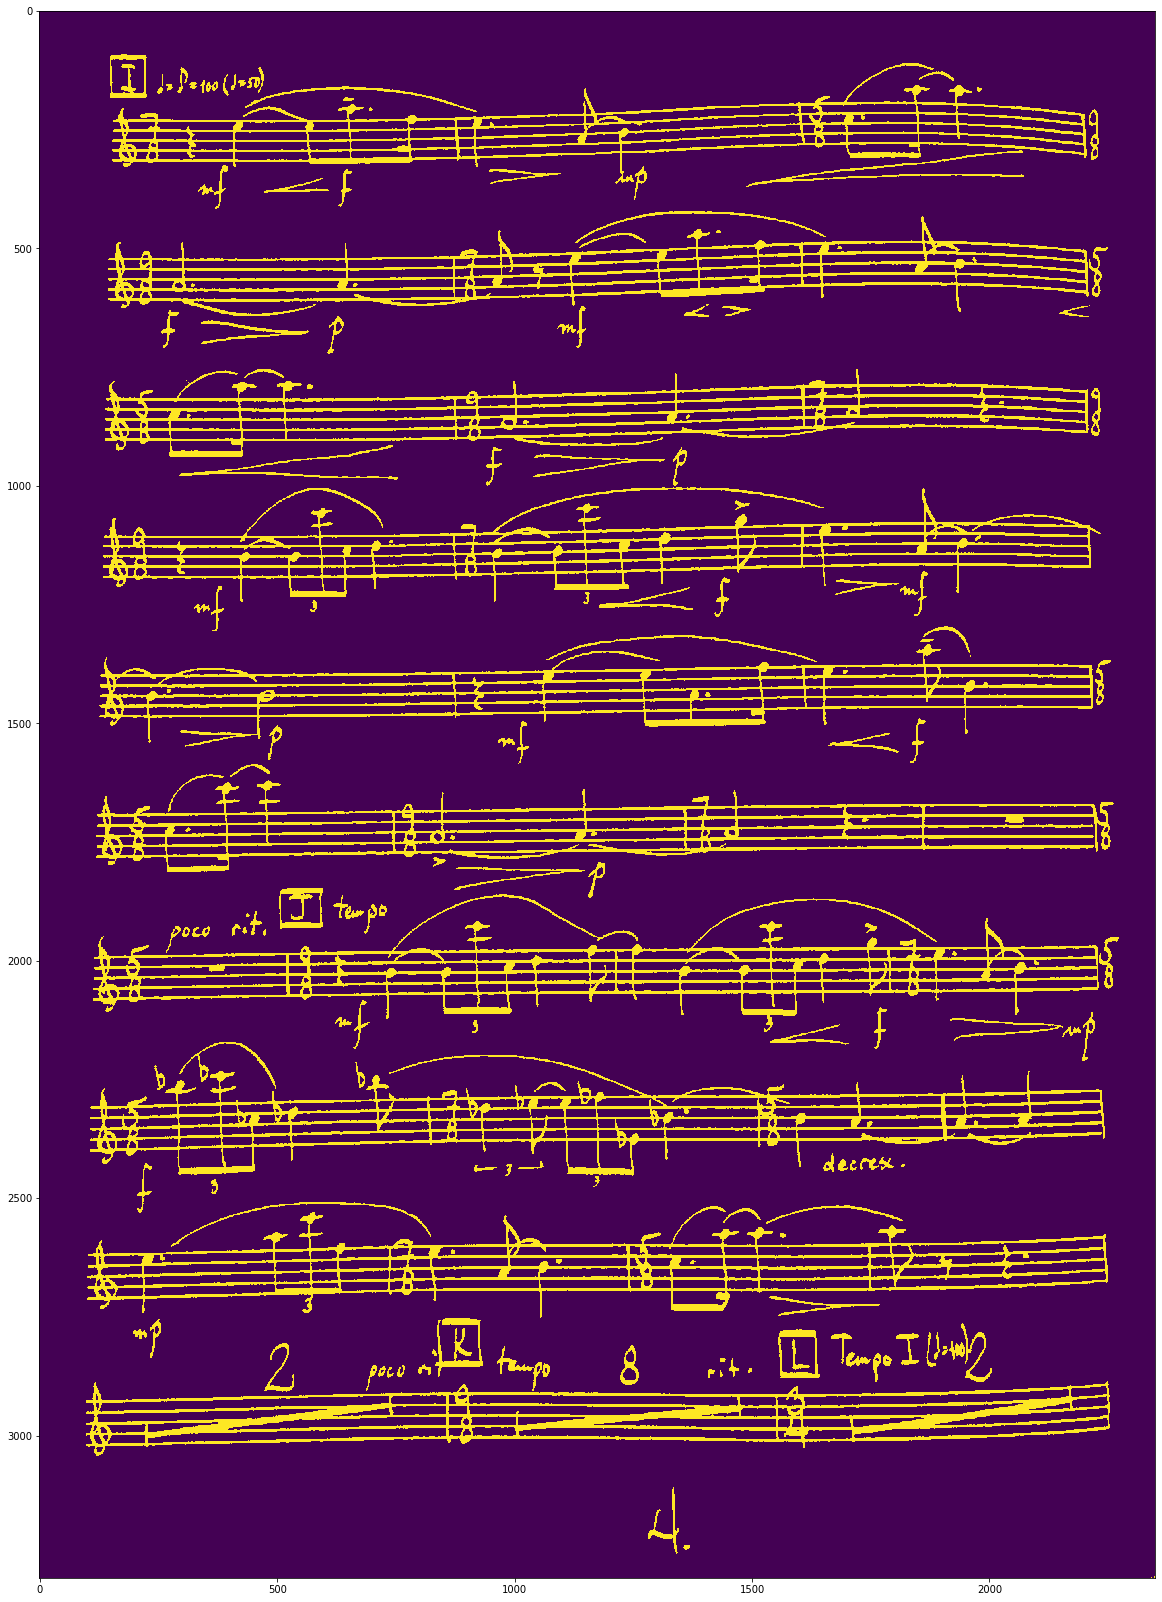

In [14]:
plt.figure(figsize=(20,30))
plt.imshow(music)

In [143]:
extracted_staff

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ...,   0,   0,   0]], dtype=uint8)

In [102]:
extracted_negative = ~extracted_staff
extracted_negative = extracted_negative.astype(float)

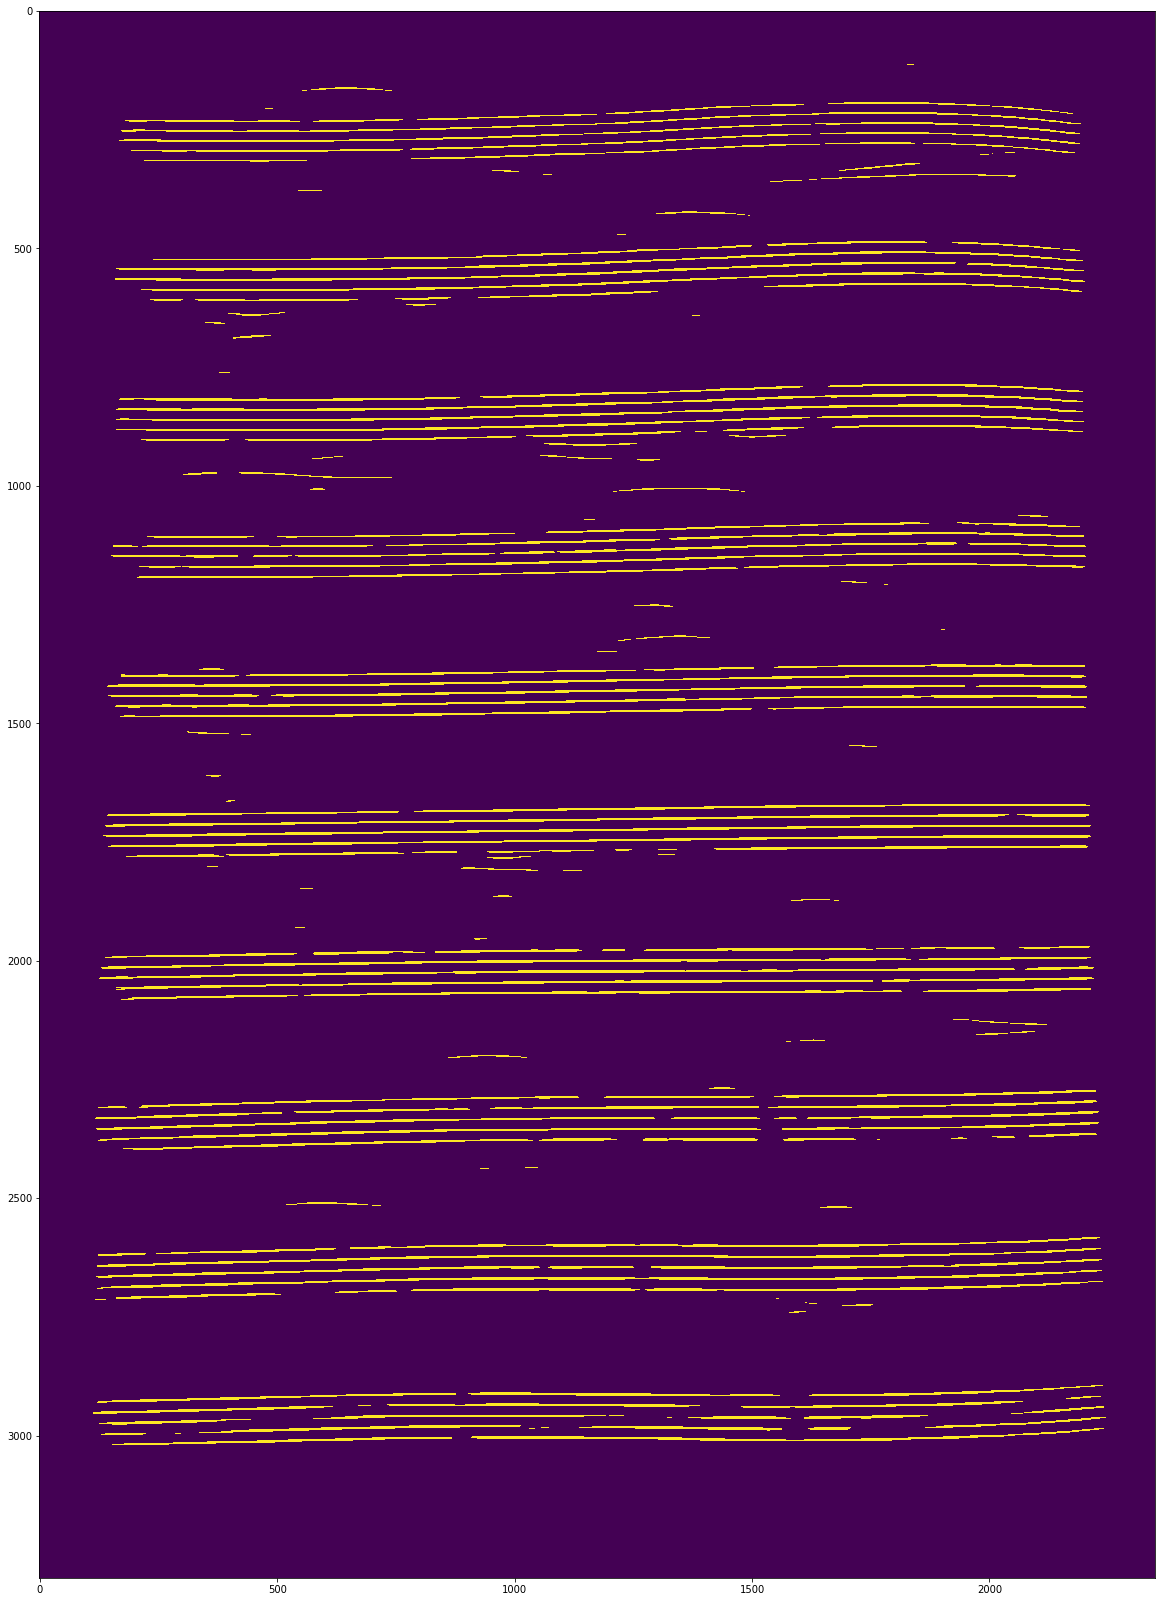

In [169]:
plt.figure(figsize=(20, 30))
plt.imshow(extracted_negative)

In [27]:
from skimage.transform import resize

In [28]:
val = filters.threshold_otsu(blank_staff)

In [29]:
blank_negative = blank_staff.copy()
blank_negative = resize(blank_negative, music.shape)
blank_negative[blank_negative > val] = 255
blank_negative[blank_negative <= val] = 0

In [30]:
blank_negative = (~(blank_negative.astype(np.uint8)))

In [31]:
np.max(blank_negative)

255

In [32]:
blank_negative

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

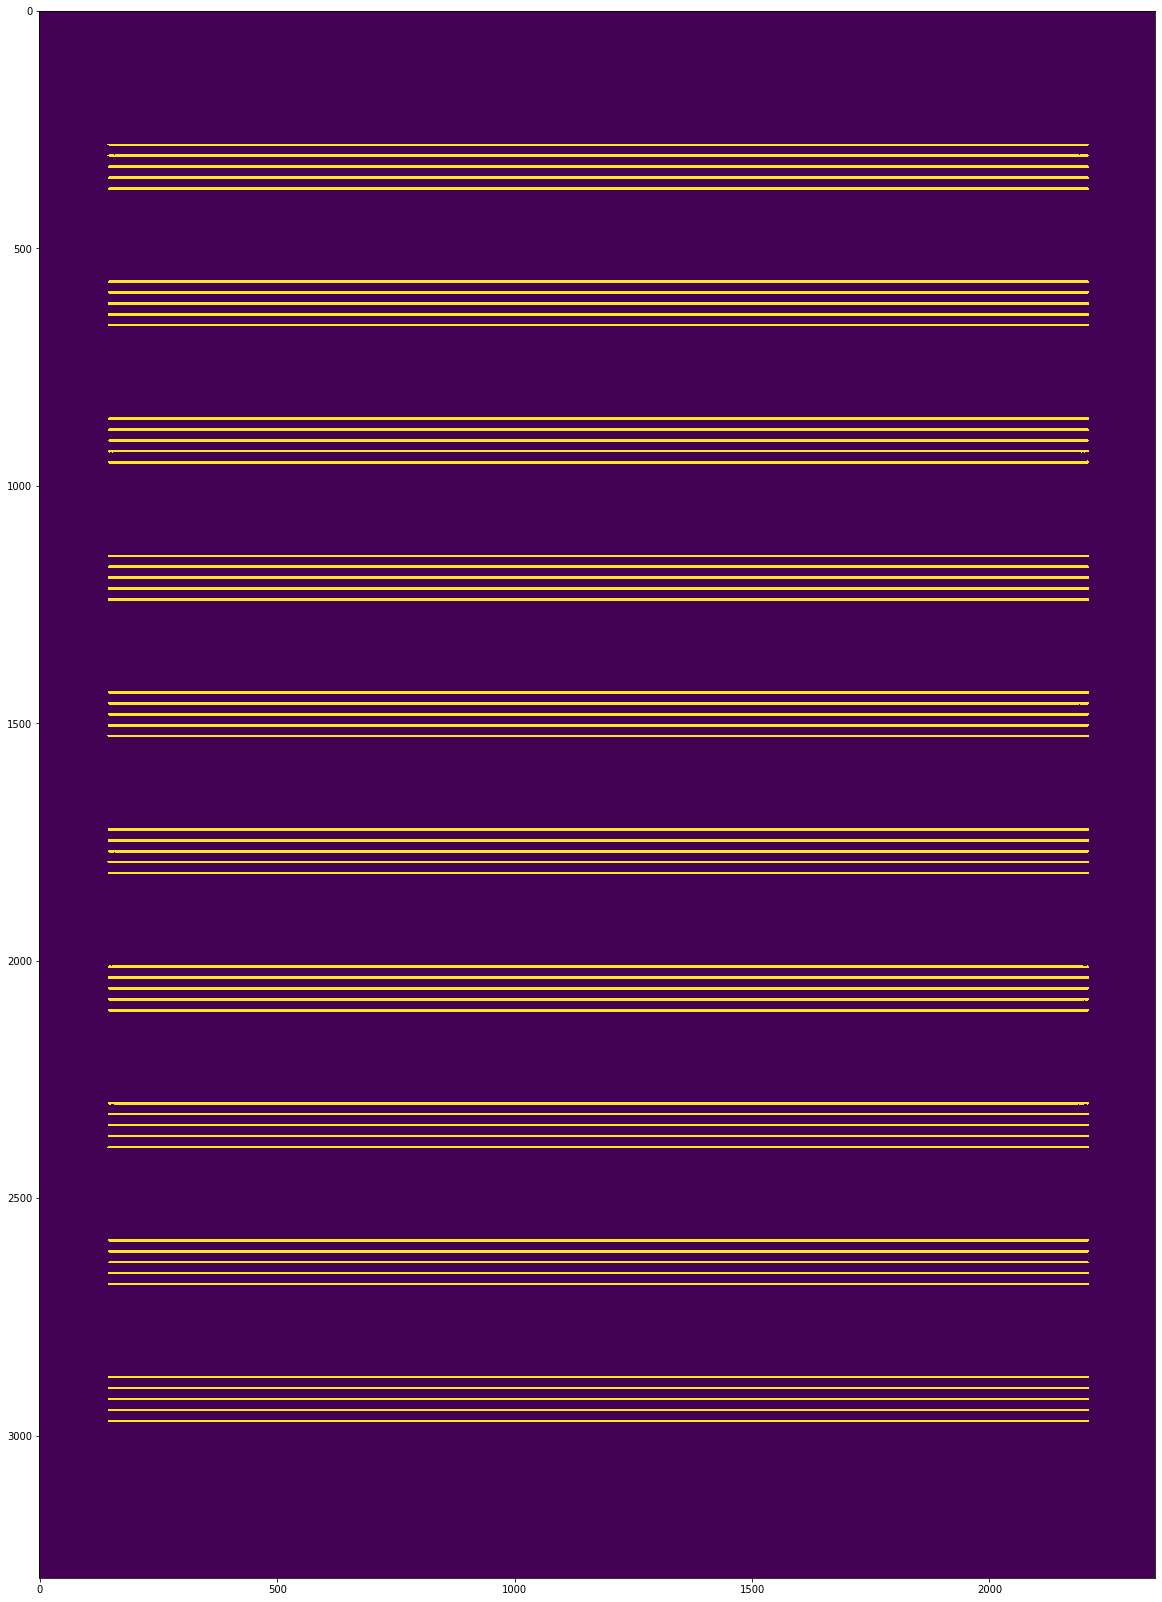

In [33]:
plt.figure(figsize=(20, 30))
plt.imshow(blank_negative)

## Run Deformation

In [34]:
from dipy.data import get_fnames
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric, EMMetric
import dipy.align.imwarp as imwarp
from dipy.viz import regtools


fname_moving = get_fnames('reg_o')
fname_static = get_fnames('reg_c')

moving = music
static = blank_negative

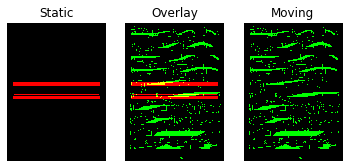

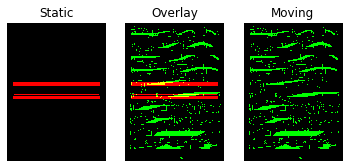

In [35]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving',
                        'input_images.png')

In [36]:
dim = static.ndim
metric = SSDMetric(dim)

In [37]:
level_iters = [200, 100, 50, 25]

sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter=50)

In [38]:
mapping = sdr.optimize(static, moving)

KeyboardInterrupt: 

(array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ],
        ...,
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.00001, ..., 127.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ..., 127.     , 127.     ,
         127.     ]], dtype=float32),
 array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 127.      , 127.      , ..., 127.      , 127.      ,
         127.      ],
        ...,
        [  0.      , 113.56663 , 127.      , ..., 127.      , 127.      ,
         127.      ],
        [  0.      , 118.584854, 

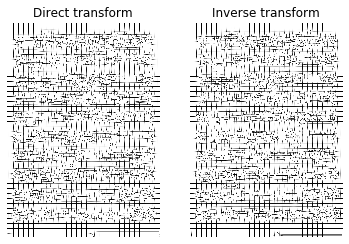

In [191]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

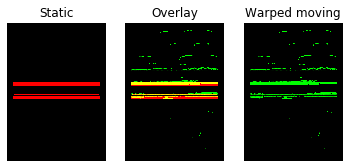

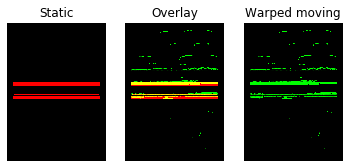

In [192]:
warped_moving = mapping.transform(moving, 'linear')
regtools.overlay_images(static, warped_moving, 'Static', 'Overlay',
                        'Warped moving', 'direct_warp_result.png')

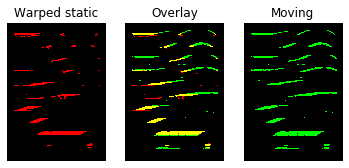

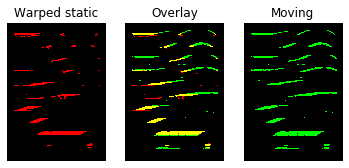

In [193]:
warped_static = mapping.transform_inverse(static, 'linear')
regtools.overlay_images(warped_static, moving, 'Warped static', 'Overlay',
                        'Moving', 'inverse_warp_result.png')

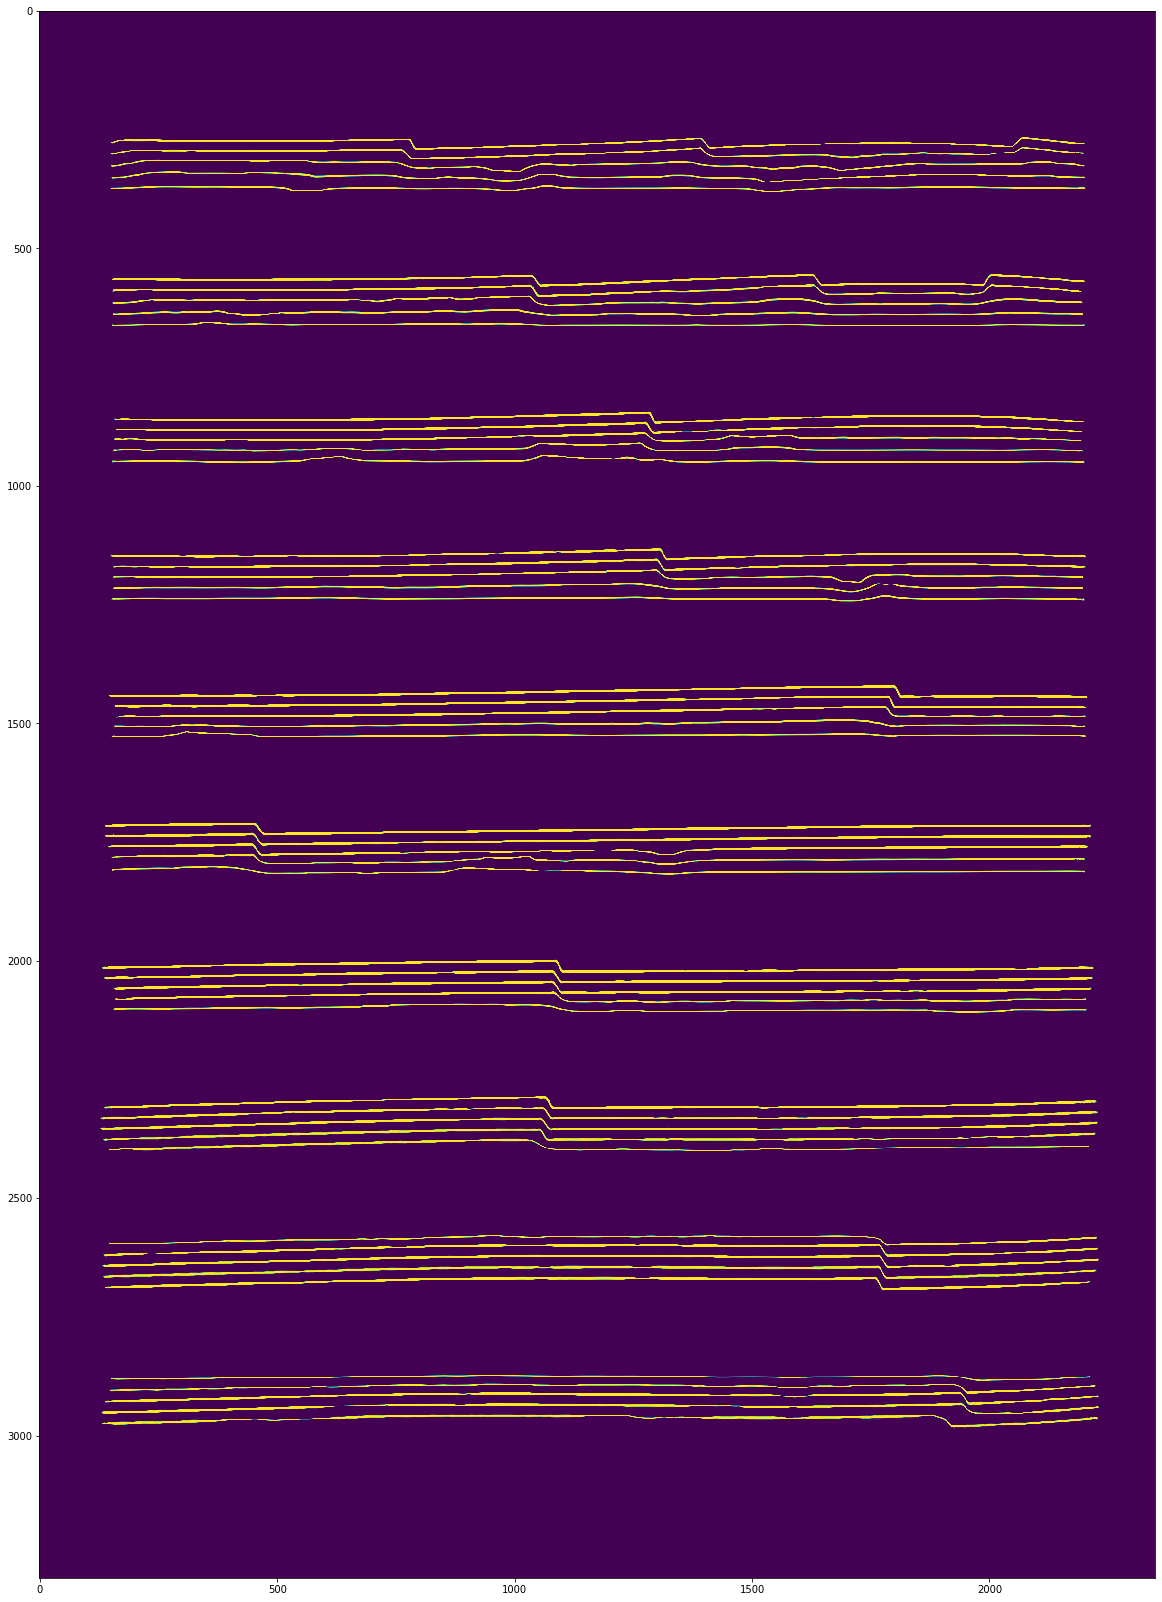

In [195]:
plt.figure(figsize=(20,30))
plt.imshow(warped_static)

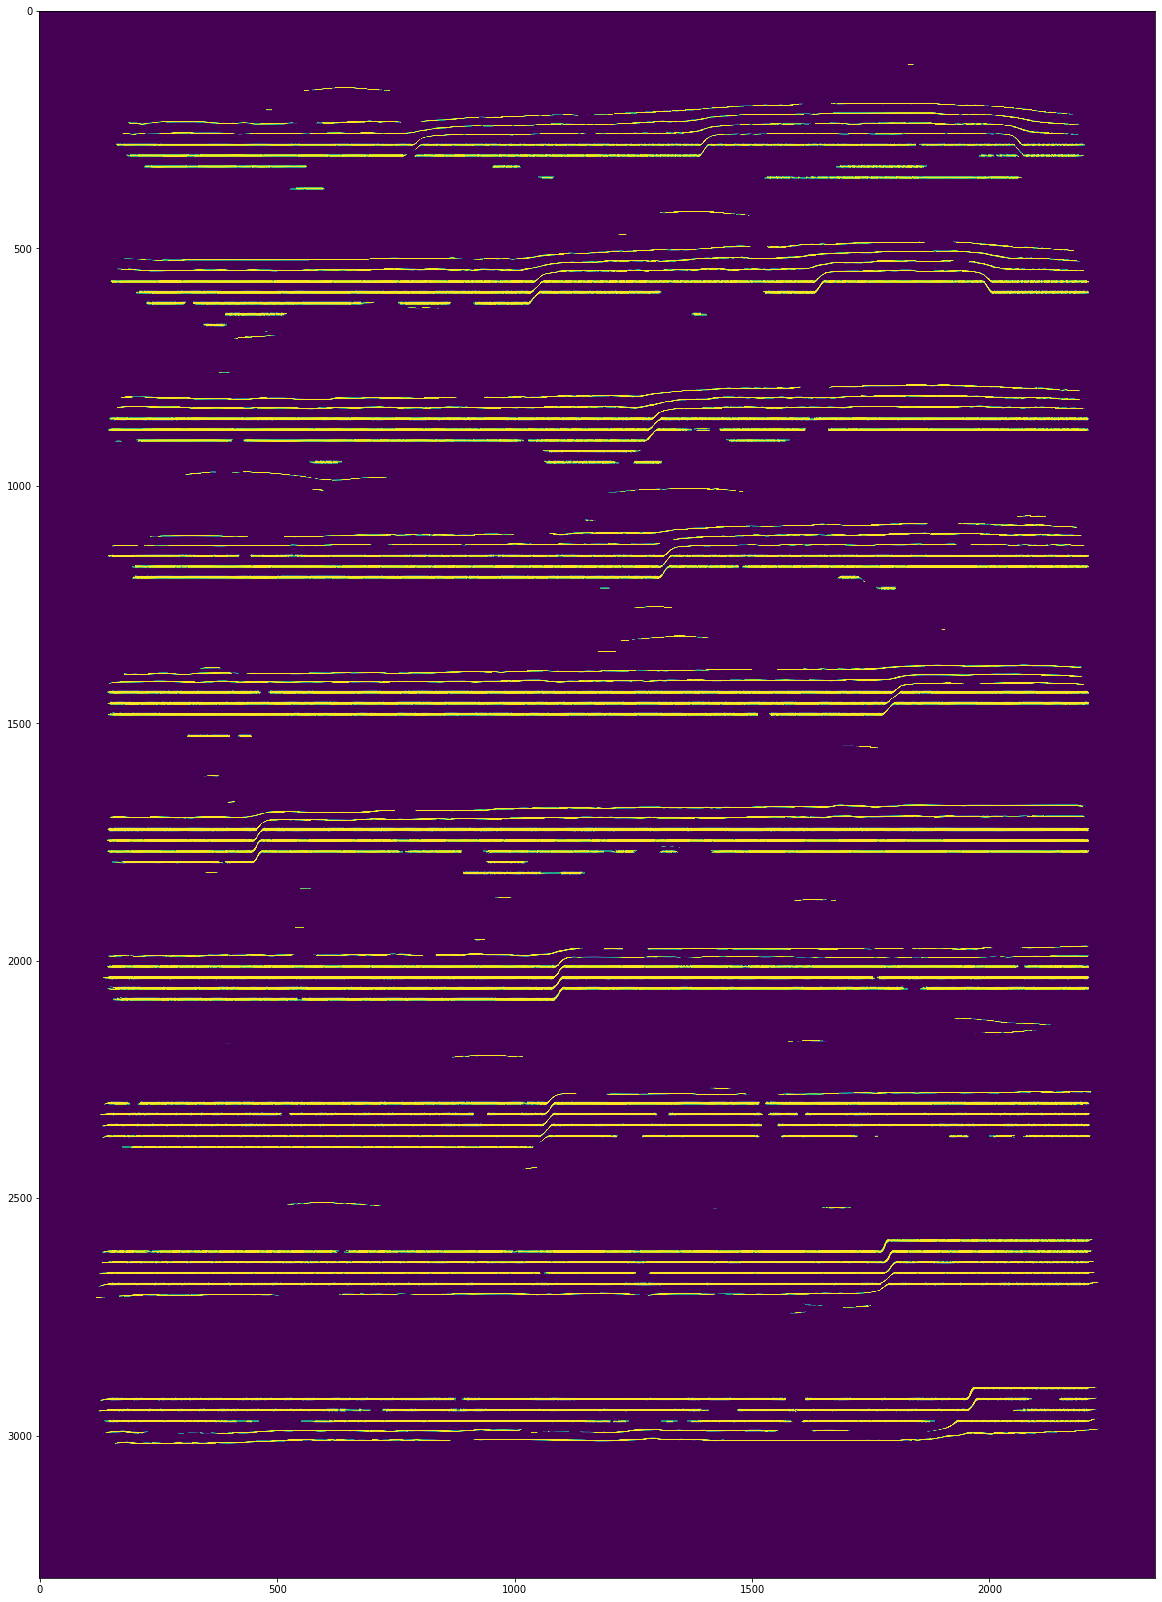

In [196]:
plt.figure(figsize=(20,30))
plt.imshow(warped_moving)

Test streamlines

In [ ]:
from dipy.viz import window, actor
from time import sleep
from dipy.data import two_cingulum_bundles

cb_subj1, cb_subj2 = two_cingulum_bundles()

from dipy.align.streamlinear import StreamlineLinearRegistration
from dipy.tracking.streamline import set_number_of_points

In [ ]:
cb_subj1

In [ ]:
blank_staff = set_number_of_points(blank_staff, 200)
extracted_staff = set_number_of_points(extracted_staff, 200)

In [ ]:
srr = StreamlineLinearRegistration()

srm = srr.optimize(static=blank_staff, moving=extracted_staff)

In [ ]:
cb_subj2_aligned = srm.transform(cb_subj2)


def show_both_bundles(bundles, colors=None, show=True, fname=None):

    ren = window.Renderer()
    ren.SetBackground(1., 1, 1)
    for (i, bundle) in enumerate(bundles):
        color = colors[i]
        lines_actor = actor.streamtube(bundle, color, linewidth=0.3)
        lines_actor.RotateX(-90)
        lines_actor.RotateZ(90)
        ren.add(lines_actor)
    if show:
        window.show(ren)
    if fname is not None:
        sleep(1)
        window.record(ren, n_frames=1, out_path=fname, size=(900, 900))


show_both_bundles([cb_subj1, cb_subj2],
                  colors=[window.colors.orange, window.colors.red],
                  show=False,
                  fname='before_registration.png')


In [ ]:
show_both_bundles([cb_subj1, cb_subj2_aligned],
                  colors=[window.colors.orange, window.colors.red],
                  show=False,
                  fname='after_registration.png')
